# Presentation

## Exploration and Modeling of U.S. Permanent Visa Applications, 2012-2017

This project takes a close look at United States Permanent Visa Applications submitted between 2012 and 2017. An exploratory data analysis examines which employers and industries are bringing in the most immigrants, where these immigrants are moving to, and where they are coming from. It also begins to investigate which factors are correlated with visa approval. For my challenge area, I looked at several methods of topic extraction for text columns about applicants' jobs and industries, including Latent Dirichlet Allocation and two models of non-negative matrix factorization. Finally, this project aims to predict whether visa applications will be approved or denied using logistic regression and machine learning.

In order for U.S. employers to hire a foreign worker permanently, the worker must be approved for a certification, or visa, by the U.S. Department of Labor. Data on these applications is posted annually in different sets on the Department's website, which were combined into one large data set and posted on Kaggle by Jacob Boysen (jboysen) as "us-perm-visas".<br>
This data set, with nearly 375,000 observations and over 70 columns, contains information on all U.S. permanent work visa applications from 2012 to 2017, including employer, position, wage offered, job posting history, employee education, and final decision.

- Which employers, cities, and industries are bringing in the most immigrants? What countries are they coming from?
- What factors are correlated with whether a visa request will be approved or denied?
- How can I use natural language processing to determine the essential industries and fields bringing in immigrants?
- Can I predict whether a visa request will be approved or denied?

## Import and Tidy Discussion

Refer to Notebook 2: [Import and Tidy](02-Import & Tidy.ipynb)<br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
visas = pd.read_csv('/data/markellekelly/visas.csv',parse_dates=['decision_date'],
                   dtype=str,index_col=0)

In [3]:
numeric_list = ['employer_num_employees','job_info_experience_num_months','overall_wage_offer','employer_desperation',
               'annual_wage']
for x in numeric_list:
    visas[x] = visas[x].apply(pd.to_numeric)

## Important Data Analysis and Visualizations

In [4]:
import altair as alt
from vega_datasets import data
cities = visas['case_no'].groupby(visas['job_info_work_city']).aggregate('count').reset_index()
cities.sort_values(by='case_no',ascending=False)
top75cities = cities.sort_values(by='case_no',ascending=False)[:75]
top75cities['latitude'] = [40.7128,30.6280,37.3382,47.6740,29.7604,
                           37.7749,37.3861,37.3541,37.3688,47.6062,
                           33.0198,41.8781,34.0522,32.7157,40.5187,
                           32.8140,33.7490,30.2672,32.7791,37.5483,
                           45.5229,37.3230,37.4419,40.7282,42.3601,
                           42.7284,25.7617,33.6846,42.4990,39.9612,
                           40.5549,34.0754,37.4530,38.9072,27.9506,
                           47.6101,38.9696,40.5754,38.6780,40.3573,
                           32.9483,40.5940,40.4317,35.2271,40.4406,
                           33.3062,37.5364,37.4323,42.3736,40.7357,
                           40.8932,40.6782,33.4484,39.9526,37.4852,
                           42.0334,37.7022,37.5407,42.4793,38.9586,
                           35.7915,34.0007,41.9868,40.4976,38.2527,
                           42.4734,29.4241,38.8462,40.5793,37.6624,
                           39.2904,32.3668,40.3383,37.5630,38.8943]
top75cities['longitude'] =[74.0060,96.3344,121.8863,122.1215,95.3698,
                           122.4194,122.0839,121.9552,122.0363,122.3321,
                           96.6989,87.6298,118.2437,117.1611,74.4121,
                           96.9489,84.3880,97.7431,96.8003,121.9886,
                           122.9898,122.0322,122.1430,74.0776,71.0589,
                           73.6918,80.1918,117.8265,83.3677,82.9988,
                           74.4643,84.2941,122.1817,77.0369,82.4572,
                           122.2015,77.3861,74.3224,121.1761,74.6672,
                           96.7299,74.6049,74.4050,80.8431,79.9959,
                           111.8413,122.2455,121.8996,71.1097,74.1724,
                           74.0117,73.9442,112.0740,75.1652,122.2364,
                           88.0834,121.9358,77.4360,71.1523,77.3570,
                           78.7811,81.0348,87.8722,74.4885,85.7585,
                           83.2219,98.4936,77.3064,74.4115,121.8747,
                           76.6122,86.3000,74.5853,122.3255,77.4311]
top75cities['longitude'] = top75cities['longitude'] * -1

In [5]:
def top_employer(x):
    subset = visas[visas['job_info_work_city'] == x]
    groups = subset['case_no'].groupby(visas['employer_name']).aggregate('count').reset_index()
    sort = groups.sort_values(by='case_no',ascending=False)
    return (sort.iloc[0]['employer_name'],sort.iloc[0]['case_no'])

In [6]:
employer1_list = []
employer_count_list = []
for val in top75cities['job_info_work_city']:
    emp1, emp2 = top_employer(val)
    employer1_list.append(emp1)
    employer_count_list.append(emp2)
top75cities['top_employer'] = employer1_list
top75cities['employer_count'] = employer_count_list

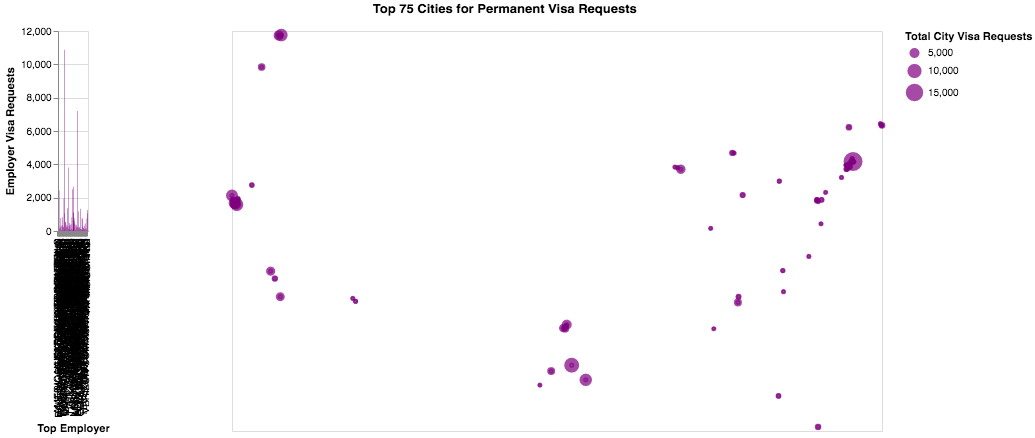

In [7]:
states = alt.UrlData(data.us_10m.url,
                     format=alt.TopoDataFormat(type='topojson',
                                               feature='states'))
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    title='Top 75 Cities for Permanent Visa Requests',
    projection={'type': 'albersUsa'},
    width=650,
    height=400
)
base2 = alt.Chart(top75cities).encode(
    alt.X('longitude', type='longitude'),
    alt.Y('latitude', type='latitude')
)
points1 = base2.mark_circle().encode(
    alt.Size('case_no',legend=alt.Legend(title="Total City Visa Requests")),
    alt.ColorValue('purple')
)
chart1 = background + points1
hover = alt.selection(type='single', on='mouseover', nearest=True,
                      fields=['latitude', 'longitude'])
base = alt.Chart(top75cities).encode(
    alt.X('longitude', type='longitude'),
    alt.Y('latitude', type='latitude')
)
text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('job_info_work_city', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)
points = base.mark_point().encode(
    color=alt.value('purple'),
    size=alt.condition(~hover, alt.value(10), alt.value(70)),
    opacity=alt.value(0.6)
).properties(
    selection=hover
)
chart = chart1 + points + text
bars = alt.Chart(top75cities).mark_bar().encode(
    alt.X('top_employer',axis=alt.Axis(title='Top Employer')),
    alt.Y('employer_count',axis=alt.Axis(title='Employer Visa Requests'),scale=alt.Scale(domain=[0,12000])),
    alt.ColorValue('purple')
).transform_filter(
    hover.ref()
).properties(
    width=30,
    height=200
)
alt.hconcat(bars,chart,padding={'left':1, 'top': 1, 'right': 1, 'bottom': 1} )

A lot of conclusions can be drawn from this visualization: the top employers requesting permanent visas are on the West or East coasts, in Texas, or in the Midwest. Notably large employers are Cognizant Technology Solutions in College Station, Texas, (home of Texas A&M University) which submits the most visa requests of any United States employer by a landslide, as well as Microsoft in Redmond, Washington, Apple in Cupertino, California, and Infosys in Plano, Texas. Additionally, the Brooklyn area has the most visa requests of any city, but does not have any individual employers with lots of requests (all are under 2,000), simply lots of employers overall.

## Topic Modeling: Frobenius Non-negative Matrix Factorization

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [9]:
def list_top_words(model, feature_names, top_words):
    '''Creates and returns a dictionary with keys corresponding to the topic and values of
    lists containing the top words of that topic'''
    topdict = {}
    for topic_idx, topic in enumerate(model.components_):
        keyname = "Topic {0}".format(topic_idx)
        topdict[keyname] = [feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]
    return topdict

In [10]:
def print_top_words(topdict):
    '''Prints the topics and their top words based on the input topic dictionary'''
    for key in topdict:
        string = key + ': '
        string += ' '.join([x for x in topdict[key]])
        print(string)

In [11]:
features = 1000
components = 15
top_words = 15
v = TfidfVectorizer(max_df=0.95, min_df=2,max_features=features, stop_words='english')
tfidf = v.fit_transform(visas['all_text'])

In [12]:
#Note: Takes about one minute to run:
nmf = NMF(n_components=components, random_state=1,alpha=.1, l1_ratio=.5).fit(tfidf)

In [13]:
tfidf_feature_names = v.get_feature_names()
fnmftopicdict = list_top_words(nmf, tfidf_feature_names, top_words)
print_top_words(fnmftopicdict)

Topic 0: programming custom computer services applications developers engineers analysts programmer analyst programmers administrators database sr network
Topic 1: systems computer design analysts services related analyst network administrators bus iv consultant sci administrator math
Topic 2: science computer related engineer engineering field software senior developer programmer technical development analyst sr ii
Topic 3: engineering electrical engineer electronics related electronic field manufacturing senior engineers software communication technical communications engg
Topic 4: mfg advanced manufacturing engineers semiconductor electronics electronic component equipment computer device materials communications peripheral scie
Topic 5: business administration marketing analyst manager management research managers related market analysts operations specialists accounting senior
Topic 6: sci comp eng math bus analyst info field ii systems engg electronic physics closely iv
Topic 7: 

In [14]:
def primary_topic(x):
    '''Using word counts, determines the most relevant topic for an observation'''
    countsdict={'Topic {0}'.format(x):0 for x in range(0,15)}
    for word in x.split(' '):
        for key in fnmftopicdict:
            if word.lower() in fnmftopicdict[key]:
                countsdict[key] += 1
    if max(countsdict.values()) == 0:
        return 'None'
    return max(countsdict, key=countsdict.get)

In [15]:
visas['topic'] = visas['all_text'].apply(primary_topic)

## Modeling: K-Nearest Neighbors

In [16]:
def simple_employer(x):
    '''If employer is in the top 48 employers (more than 500 applicants), return the employer name.
    Otherwise, return a string of the word Other.'''
    if x in topemployers:
        return x
    return "Other"

In [17]:
def get_year(x):
    if pd.notnull(x):
        return x.year
    return x

In [18]:
visasemployers = visas.groupby('employer_name')['case_no'].aggregate('count').reset_index().sort_values(by='case_no',ascending=False)
visastopemployers = visasemployers[visasemployers['case_no']>=500]
topemployers = list(visastopemployers['employer_name'])
visas['employer_simple'] = visas['employer_name'].apply(simple_employer)
visas['decision_year'] = visas['decision_date'].apply(get_year)
categorical = ['case_status','class_of_admission','foreign_worker_info_birth_country',
               'foreign_worker_info_education','ji_live_in_domestic_service','job_info_foreign_ed',
              'job_info_foreign_lang_req','job_info_education','naics_code','pw_level_9089',
               'ri_layoff_in_past_six_months','wage_offer_unit_of_pay_9089',
               'professional_occupation','topic','employer_simple','decision_year']
for data in categorical:
    visas[data] = pd.get_dummies(visas[data], drop_first = True)
list1 = ['employer_num_employees','foreign_worker_info_birth_country',
         'foreign_worker_info_education','foreign_worker_info_inst',
         'ji_live_in_domestic_service','job_info_education',
         'job_info_experience','job_info_experience_num_months',
         'job_info_foreign_ed','job_info_foreign_lang_req',
         'job_info_work_postal_code','ri_layoff_in_past_six_months',
         'employer_desperation','professional_occupation']
for x in list1:
    visas.loc[0:126848,x] = "-1"

In [19]:
visas_non_null = visas.dropna(subset=['class_of_admission','employer_num_employees','foreign_worker_info_birth_country',
                 'foreign_worker_info_education','ji_live_in_domestic_service','job_info_foreign_ed',
                 'job_info_foreign_lang_req','job_info_experience_num_months','job_info_education','decision_year',
                 'naics_code','pw_level_9089','ri_layoff_in_past_six_months','wage_offer_unit_of_pay_9089',
                 'employer_desperation','annual_wage','professional_occupation'])
X = visas_non_null[['class_of_admission','employer_num_employees','decision_year','foreign_worker_info_birth_country',
                 'foreign_worker_info_education','ji_live_in_domestic_service','job_info_foreign_ed',
                    'job_info_foreign_lang_req','job_info_experience_num_months','job_info_education',
                 'naics_code','pw_level_9089','ri_layoff_in_past_six_months','wage_offer_unit_of_pay_9089',
                 'employer_desperation','annual_wage','professional_occupation','topic','employer_simple']]
y=visas_non_null['case_status']

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=1)
knn = KNeighborsClassifier(n_neighbors=8,algorithm = 'auto')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.929614151035086

In [22]:
print(metrics.classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.99      0.94      0.96     50551
          1       0.13      0.54      0.21       894

avg / total       0.98      0.93      0.95     51445



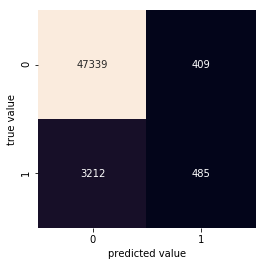

In [23]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [24]:
print(metrics.classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.99      0.94      0.96     50551
          1       0.13      0.54      0.21       894

avg / total       0.98      0.93      0.95     51445

